### **Gaussian Naive Bayes Classification Algorithm (ML)**

### Understanding Naive Bayes Concepts

* Naive Bayes algorithm, which is a powerful yet simple supervised machine learning algorithm used for classification tasks is based on **Bayes' Theorem**.

### What is Bayes' Theorem?

* Bayes' Theorem provides a way to calculate the probability of a hypothesis ($A$) given the evidence ($B$). The formula is:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

&nbsp;&nbsp;&nbsp;&nbsp;Where:

  * $P(A|B)$: The **posterior probability** of class $A$ given the feature vector $B$.
  * $P(B|A)$: The **likelihood** of the features $B$ given that the class is $A$.
  * $P(A)$: The **prior probability** of class $A$.
  * $P(B)$: The **prior probability** of features $B$.

### The 'Naive' Assumption

* The 'naive' part of the name comes from a very strong assumption: that all features are **independent** of each other. 

* This means the value of one feature does not influence the value of another, given the class. 

* While this assumption is often not true in the real world, the algorithm still performs surprisingly well, especially for text classification and other high-dimensional datasets.

* The independence assumption simplifies the calculation significantly:

$$
P(features|class) = P(feature_1|class) \cdot P(feature_2|class) \cdot ... \cdot P(feature_n|class)
$$

* The final prediction is the class with the highest probability, calculated as:

$$
Class = argmax_{C} [P(C) \cdot \prod_{i=1}^{n} P(F_i|C)]
$$

### What is Gaussian Naive Bayes (GaussianNB)?

* Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that is used for continuous features. 

* It assumes that the values of each feature follow a **Gaussian (Normal) Distribution** within each class. 

* The probability density function for a normal distribution is given by:

$$
P(x|C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} e^{-\frac{(x-\mu_C)^2}{2\sigma_C^2}}
$$

* The model calculates the mean ($\mu_C$) and variance ($\sigma_C^2$) for each feature and for each class from the training data. 

* These parameters are then used to calculate the probability of a new data point belonging to each class. 

* The class with the highest probability is chosen as the prediction.

* This algorithm is simple to implement, fast to train, and often serves as an excellent baseline model.

---

### Step 1: Import Necessary Libraries

* We start by importing the essential libraries: `numpy` for numerical operations, `pandas` for data manipulation, `matplotlib` for plotting, `seaborn` for enhanced visualizations, `train_test_split` to divide our data, `GaussianNB` for the model, and metrics like `accuracy_score` to evaluate performance.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load and Explore the Dataset
* We use `customer_churn_nb.csv` dataset to predict customer churn based on two features: `Monthly_Bill` and `Support_Calls`. 

* This dataset have a clear separation between the two classes (`No Churn` vs. `Churn`) to easily visualize the algorithm's performance. `Churn=0` represents no churn, and `Churn=1` represents churn.

In [3]:
# Load and explore the dataset
df = pd.read_csv('customer_churn_nb.csv')
df.head()

,Monthly_Bill,Support_Calls,Churn
0,54.967142,2,0.0
1,48.617357,1,0.0
2,56.476885,3,0.0
3,65.230299,1,0.0
4,47.658466,2,0.0


In [4]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Monthly_Bill   200 non-null    float64
 1   Support_Calls  200 non-null    int64  
 2   Churn          200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [5]:
# Descriptive statistics
df.describe()

,Monthly_Bill,Support_Calls,Churn
count,200.000000,200.000000,200.000000
mean,57.318045,2.815000,0.250000
std,17.611349,1.733725,0.434099
min,23.802549,1.000000,0.000000
25%,45.333341,1.750000,0.000000
50%,52.965525,2.000000,0.000000
75%,67.176786,3.250000,0.250000
max,113.672099,7.000000,1.000000


### Step 3: Visualize the Dataset
* A scatter plot helps us understand the relationship between the features and the target variable. 

* We can see two distinct clusters, which suggests that our features are good predictors for churn.

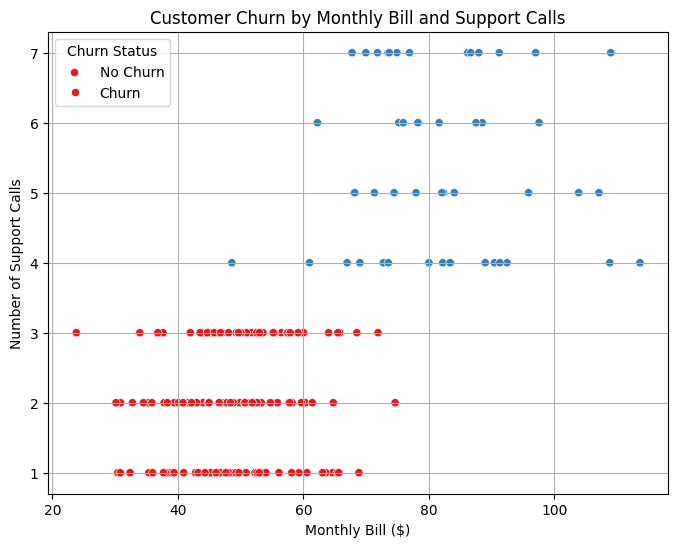

In [24]:
# Visualizing the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monthly_Bill', y='Support_Calls', hue='Churn', data=df, palette='Set1')
plt.title('Customer Churn by Monthly Bill and Support Calls')
plt.xlabel('Monthly Bill ($)')
plt.ylabel('Number of Support Calls')
plt.legend(title='Churn Status', labels=['No Churn', 'Churn'])
plt.grid(True)
plt.show()

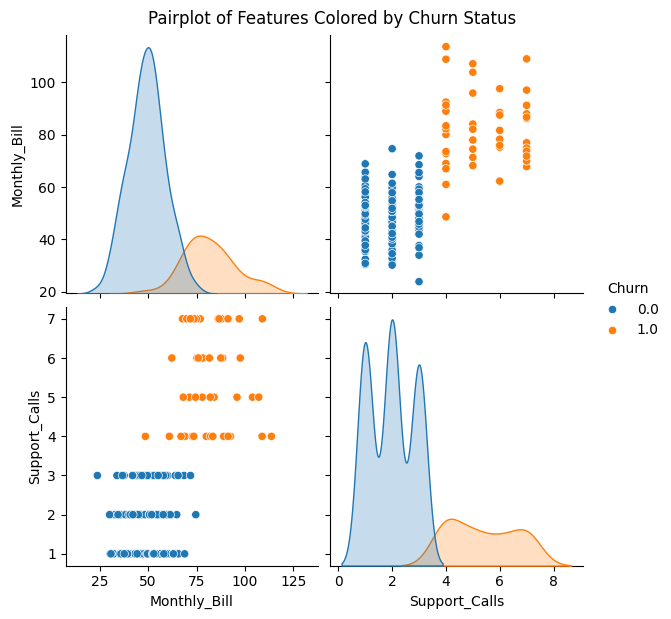

In [ ]:
# Visualizing the data using pairplot
# This will help us understand the relationships between features
sns.pairplot(df, hue='Churn', height=3)
plt.suptitle('Pairplot of Features Colored by Churn Status', y=1.02)
plt.show()

### Step 4: Prepare Data for Training

* We split the dataset into features (`X`) and the target variable (`y`). 

* We then use `train_test_split` to create training and testing sets. 

* This is a crucial step to evaluate how well our model generalizes to new, unseen data.

In [26]:
# Feature selection
X = df[['Monthly_Bill', 'Support_Calls']]
y = df['Churn']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

### Step 5: Train the GaussianNB Model

* We initialize the `GaussianNB` classifier and train it using our training data (`X_train`, `y_train`). 

* The `.fit()` method calculates the mean and variance for each feature and each class, which are the parameters of the Gaussian distributions.

In [28]:
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

### Step 6: Make Predictions and Evaluate the Model

* Once the model is trained, we use it to make predictions on the test set (`X_test`). 

* We then evaluate the model's performance using metrics like accuracy, a confusion matrix, and a classification report.

In [29]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [30]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[30  0]
 [ 0 10]]


In [32]:
# Display a more detailed classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Step 7: Visualize the Decision Boundary 

* This step helps us understand how the model is classifying data points. 

* The decision boundary shows the line (or curve) where the model switches its prediction from one class to another. 

* The Gaussian distribution assumption results in an elliptical or curved decision boundary, which is often a good visual representation of the model's behavior.

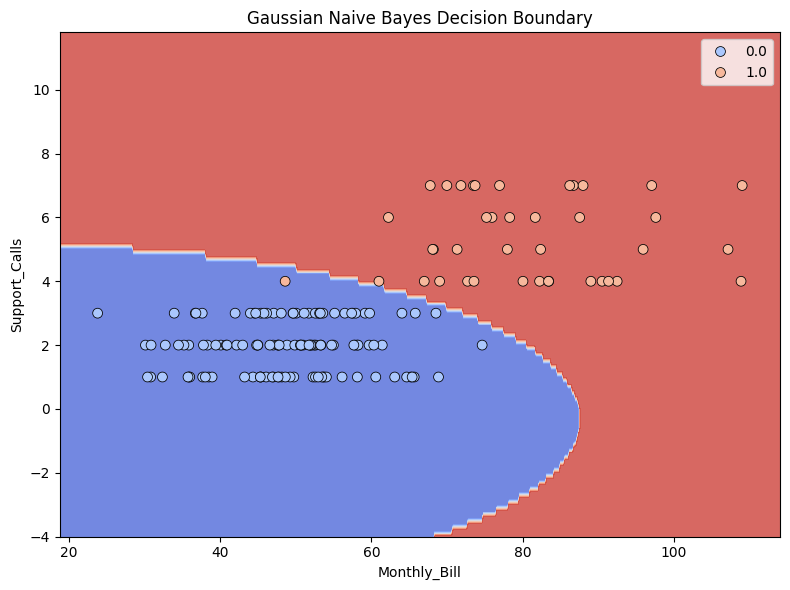

In [40]:
def plot_decision_boundary(X, y, model, title):
    feature_names = X.columns  # Keep the column names

    X = X.values
    y = y.values

    if X.shape[1] != 2:
        raise ValueError("X must have exactly 2 features.")

    h = 0.2
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Create mesh grid DataFrame with feature names
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)

    # Predict with model
    Z = model.predict(grid).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.tight_layout()
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, gnb, 'Gaussian Naive Bayes Decision Boundary')

### Summary
* This notebook provides a complete and practical demonstration of the Gaussian Naive Bayes algorithm. 

* We covered the core theoretical concepts, exploreed the dataset, trained the model, evaluated its performance, and visualized its decision boundary. 

* This process showcases the simplicity and effectiveness of this algorithm as a classification tool.

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)